### 0. Import Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### 1. 이미지 불러오기 및 확인

In [10]:
# 이미지 불러오기
image_path = './master/FM2-V160_master.jpeg'

# OpenCV로 이미지를 읽어오기 (흑백으로 변환)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일 '{image_path}'을(를) 찾을 수 없습니다.")

print(f"이미지 로드 성공: {image.shape}")

이미지 로드 성공: (448, 448)


### 2-(1). 임의로 설정한 임계값으로 Canny Edge Detection 수행

In [22]:
# Canny Edge Detection 적용
# 최소 및 최대 임곗값 설정
min_val = 50
max_val = 60

# Canny Edge Detection 수행
edges_1 = cv2.Canny(image, min_val, max_val)

### 3-(1). 시각화

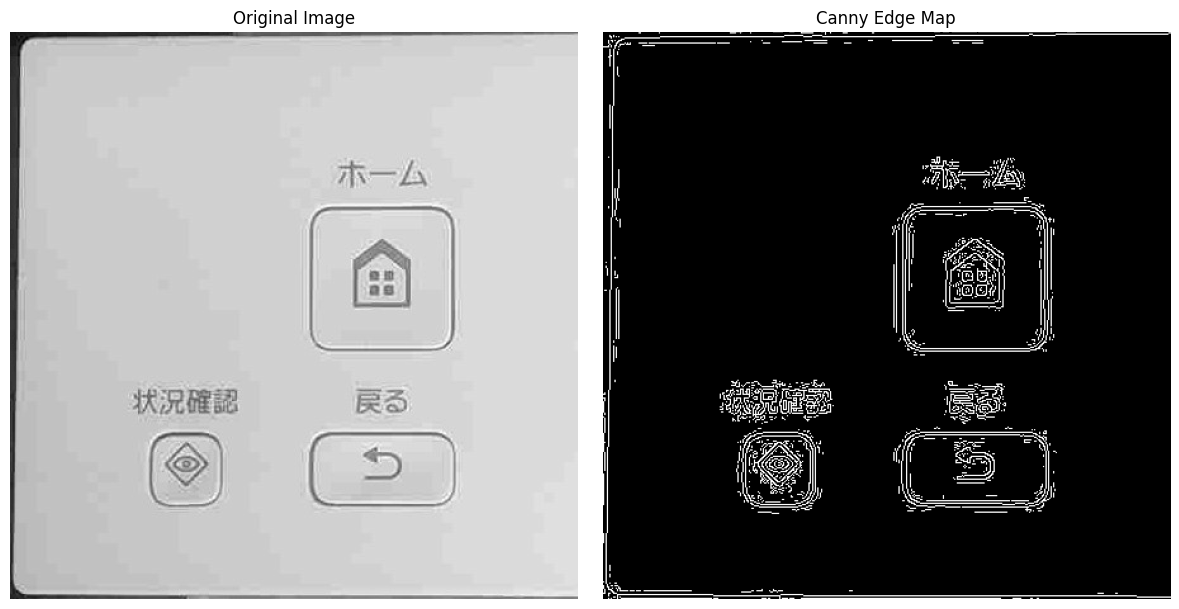

In [20]:
# 원본 이미지와 Edge Map 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원본 이미지
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Edge Map
axes[1].imshow(edges_1, cmap='gray')
axes[1].set_title("Canny Edge Map")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2-(2). Adaptive Thresholding을 위해 이진화 알고리즘 (Otsu) 적용

In [24]:
# Otsu's Binarization으로 임계값 계산
otsu_ret, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu의 반환된 임계값을 사용하여 Canny 임계값 설정
lower = int(0.5 * otsu_ret)  # Otsu 임계값의 50%
upper = int(otsu_ret)  # Otsu 임계값 자체를 upper로 사용

# Canny Edge Detection 적용
edges_2 = cv2.Canny(image, lower, upper)

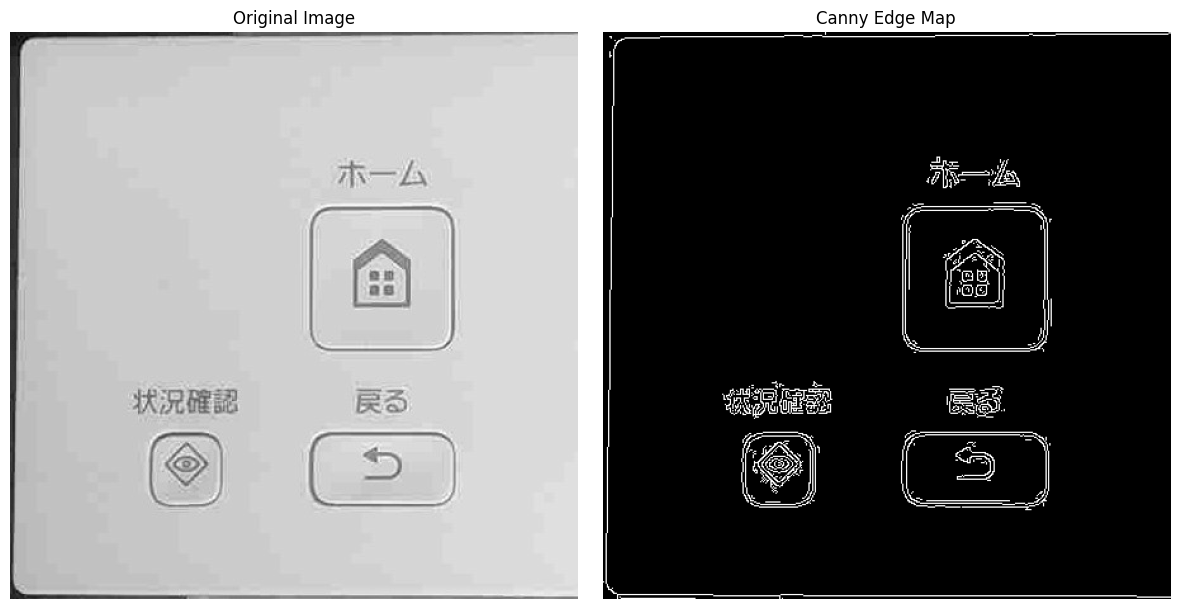

In [25]:
# 원본 이미지와 Edge Map 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원본 이미지
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Edge Map
axes[1].imshow(edges_2, cmap='gray')
axes[1].set_title("Canny Edge Map")
axes[1].axis('off')

plt.tight_layout()
plt.show()

---

### * 다양한 임계값에서의 비교

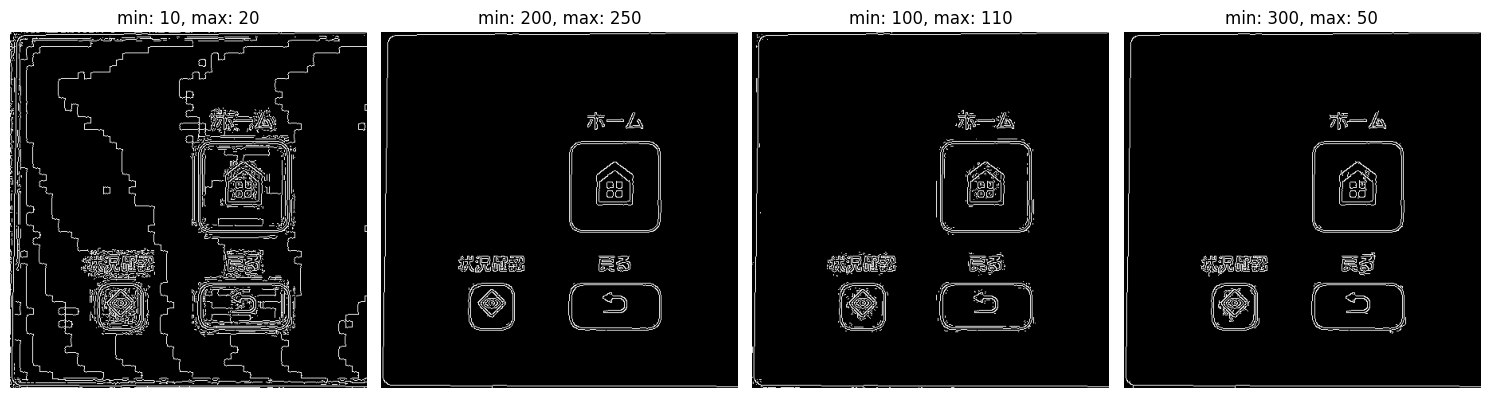

In [26]:
cases = [
    (10, 20),  # 너무 낮은 임곗값
    (200, 250),  # 너무 높은 임곗값
    (100, 110),  # 간격이 너무 좁은 경우
    (300, 50),  # 잘못된 설정
]

fig, axes = plt.subplots(1, len(cases), figsize=(15, 5))
for i, (min_val, max_val) in enumerate(cases):
    edges = cv2.Canny(image, min_val, max_val)
    axes[i].imshow(edges, cmap='gray')
    axes[i].set_title(f"min: {min_val}, max: {max_val}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()